<a href="https://colab.research.google.com/github/pmontecinos23/Sales-Predictions/blob/main/Project_1%2C_Part_4_Sales_Predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Project 1 - Part 1
Paul Montecinos

## Loading Data

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
sp_df =pd.read_csv('/content/drive/MyDrive/02 Week 2: Pandas/Project 1 Part 2/sales_predictions.csv')
sp_df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [4]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


##Data Cleaning

In [5]:
# 1 How many rows and Columns?
sp_df.shape

(8523, 12)

* There are 8,523 rows and 12 columns

In [6]:
# What are the data types of each variable
sp_df.dtypes

Item_Identifier               object
Item_Weight                  float64
Item_Fat_Content              object
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Outlet_Size                   object
Outlet_Location_Type          object
Outlet_Type                   object
Item_Outlet_Sales            float64
dtype: object

Item_Identifier, Item_Fat_Content, Item_type, Outlet_Identifier, Outlet_Size, Outlet_Location_Type, and Outlet_Type are all obects.

Outlet_Establishment_Year is an integer.

Item_Weight, Item_Visibility, Item_MRP, and Item_Outlet_Sales are are floats.

In [7]:
# 3 Are there any duplicates
sp_df.duplicated().sum()

0

In [8]:
# 4 Identify missing values
sp_df.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
# 5 Decide on how to address the missing values and do it.
sp_df[sp_df.isna().any(axis = 1)]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.20,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.20,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
...,...,...,...,...,...,...,...,...,...,...,...,...
8504,NCN18,NaN,Low Fat,0.124111,Household,111.7544,OUT027,1985,Medium,Tier 3,Supermarket Type3,4138.6128
8508,FDW31,11.35,Regular,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.10,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.00,Regular,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [10]:
sp_df.value_counts()

Item_Identifier  Item_Weight  Item_Fat_Content  Item_Visibility  Item_Type     Item_MRP  Outlet_Identifier  Outlet_Establishment_Year  Outlet_Size  Outlet_Location_Type  Outlet_Type        Item_Outlet_Sales
DRA12            11.600       LF                0.000000         Soft Drinks   141.9154  OUT035             2004                       Small        Tier 2                Supermarket Type1  992.7078             1
FDV35            19.500       Low Fat           0.128182         Breads        156.1314  OUT035             2004                       Small        Tier 2                Supermarket Type1  2792.3652            1
FDV25            5.905        low fat           0.045614         Canned        221.5456  OUT013             1987                       High         Tier 3                Supermarket Type1  6852.4136            1
                              Low Fat           0.045838         Canned        222.5456  OUT018             2009                       Medium       Tier 3   

In [11]:
sp_df.groupby(['Outlet_Type', 'Outlet_Location_Type'])['Outlet_Size'].value_counts()

Outlet_Type        Outlet_Location_Type  Outlet_Size
Grocery Store      Tier 1                Small          528
Supermarket Type1  Tier 1                Medium         930
                                         Small          930
                   Tier 2                Small          930
                   Tier 3                High           932
Supermarket Type2  Tier 3                Medium         928
Supermarket Type3  Tier 3                Medium         935
Name: Outlet_Size, dtype: int64

After comparing the size, location, and type I decided to replace the missing values using .mode(). The only consitancy I found was Grocery Store should be listed under small. I was unable to get the desired outcome.

In [12]:
sp_df_sz = sp_df['Outlet_Size'].mode()
sp_df_sz

0    Medium
dtype: object

In [13]:
sp_df['Outlet_Size'].fillna('Medium', inplace = True)

In [14]:
sp_df_lbs = sp_df['Item_Weight'].mean()
sp_df_lbs

12.857645184135976

I was unable to find any consistencies for the weights so I used the average weight using .mean()

In [15]:
sp_df['Item_Weight'].fillna(sp_df_lbs, inplace = True)

In [16]:
# 6 Confirming there are no missing values
sp_df.isna().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
# 7 Find and fix and inconsistent categories of data
sp_df.nunique()

Item_Identifier              1559
Item_Weight                   416
Item_Fat_Content                5
Item_Visibility              7880
Item_Type                      16
Item_MRP                     5938
Outlet_Identifier              10
Outlet_Establishment_Year       9
Outlet_Size                     3
Outlet_Location_Type            3
Outlet_Type                     4
Item_Outlet_Sales            3493
dtype: int64

In [18]:
sp_df['Item_Fat_Content'].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [19]:
sp_df.replace(['LF', 'reg', 'low fat'], ['Low Fat', 'Regular', 'Low Fat'], inplace = True)
sp_df.head(10)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300000,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920000,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500000,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200000,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular,0.000000,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
6,FDO10,13.650000,Regular,0.012741,Snack Foods,57.6588,OUT013,1987,High,Tier 3,Supermarket Type1,343.5528
7,FDP10,12.857645,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
8,FDH17,16.200000,Regular,0.016687,Frozen Foods,96.9726,OUT045,2002,Medium,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200000,Regular,0.094450,Frozen Foods,187.8214,OUT017,2007,Medium,Tier 2,Supermarket Type1,4710.5350


In [20]:
# 8 For any numberical columns, obtain the summary statistics of each (min, max, mean)
sp_df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


## Exploratory Visuals

In [21]:
sp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


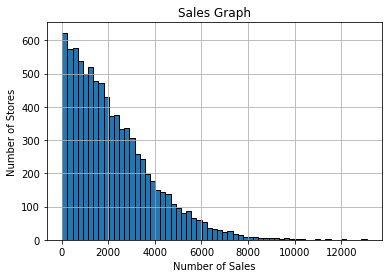

In [22]:
sp_df['Item_Outlet_Sales'].hist(bins='auto', grid = True,
                                         edgecolor='black');
plt.xlabel('Number of Sales')
plt.ylabel('Number of Stores')
plt.title('Sales Graph')
plt.show();

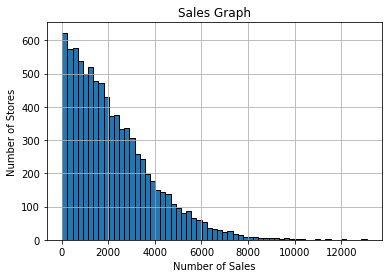

In [23]:
sp_df['Item_Outlet_Sales'].hist(bins='auto', grid = True,
                                         edgecolor='black');
plt.xlabel('Number of Sales')
plt.ylabel('Number of Stores')
plt.title('Sales Graph')
plt.show();

Majority of sales are grouped between 0.00 dollars in sales to 4000.00 dollars in sales

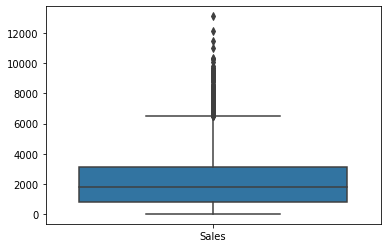

In [24]:
sp = sns.boxplot(data = sp_df[['Item_Outlet_Sales']])
sp.set_xticks(range(1))
sp.set_xticklabels(['Sales']);

The average sales were between 1500 and 3000, although there were many outliers.


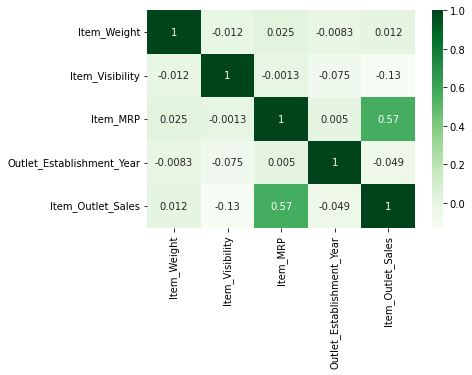

In [25]:
corr = sp_df.corr()
sns.heatmap(corr, cmap = 'Greens', annot = True);

The only real corratlation would be the moderate correlation between sales and the mrp. No other real valuable correlations between the other values.

##Explanatory Visuals

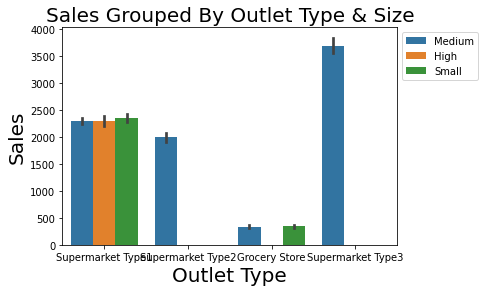

In [26]:
ax = sns.barplot(data = sp_df, x = 'Outlet_Type', y = 'Item_Outlet_Sales', hue = 'Outlet_Size')
ax.set_title('Sales Grouped By Outlet Type & Size', fontsize = 20)
ax.set_xlabel('Outlet Type', fontsize = 20)
ax.set_ylabel('Sales', fontsize = 20)
ax.legend(bbox_to_anchor=[1,1]);

Using the barplot above you can easily see Supermarket Type 1 and Type 3 generate the most in sales. Type 3 generateing roughly 1300.00 more in sales than Type 1.

You can also see the common size generating the most sales between all types is the Medium sized outlets.

Future supermarket builds should be styled after Supermarket Type 3


Text(0.5, 0.98, 'Size of Party Vs. Tip and Total Bill')

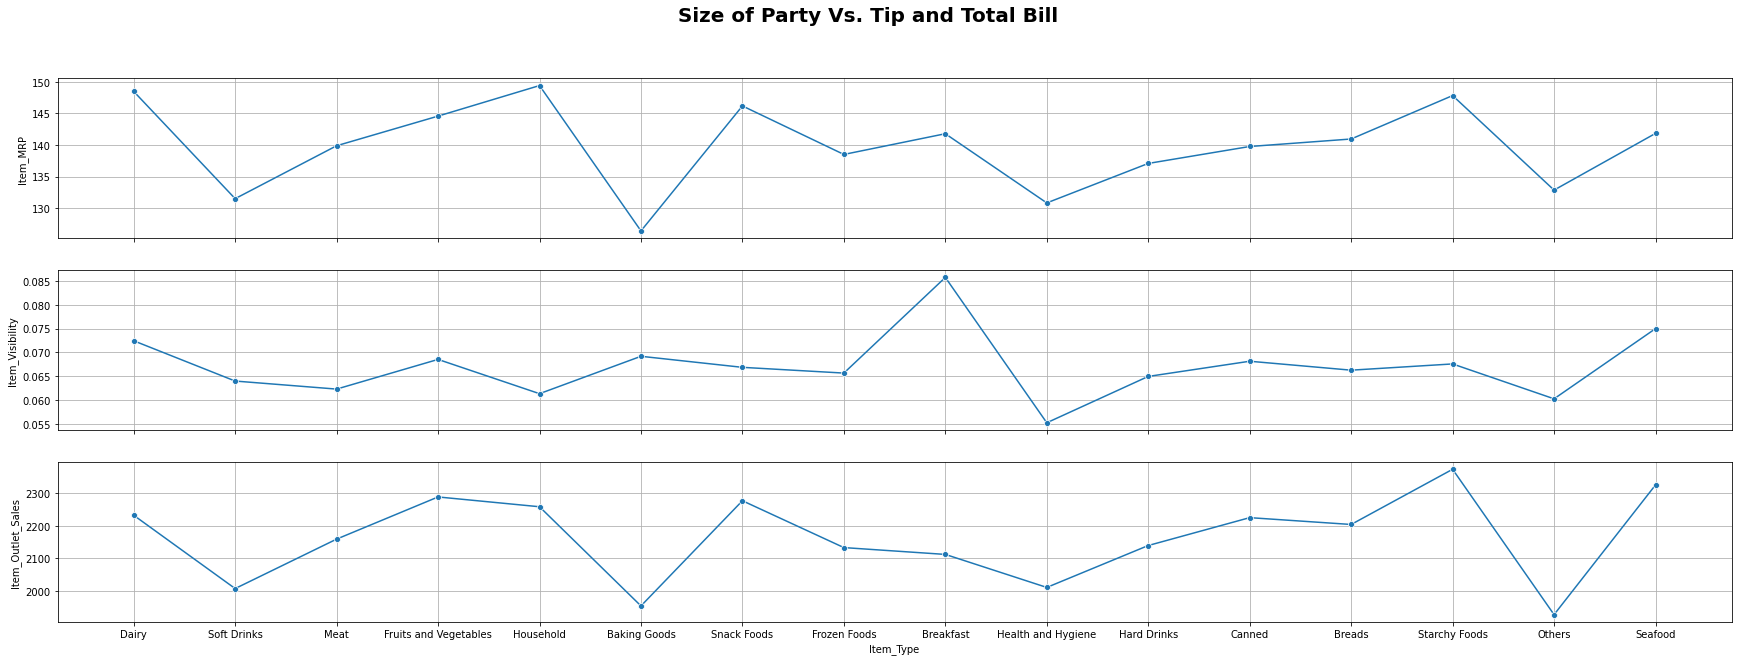

In [29]:
fig, axes = plt.subplots(nrows = 3, figsize = (30,10), sharex = True)

sns.lineplot(data = sp_df, x = 'Item_Type', y = 'Item_MRP', ci = None, marker = 'o', ax = axes[0])

sns.lineplot(data = sp_df, x = 'Item_Type', y = 'Item_Visibility', ci = None, marker = 'o', ax = axes[1])

sns.lineplot(data = sp_df, x = 'Item_Type', y = 'Item_Outlet_Sales', ci = None, marker = 'o', ax = axes[2])

[ax.grid() for ax in axes];

fig.suptitle('Item Types vs. MRP, Visibility, and Sales', fontsize = 20, fontweight = 'bold')

Using the lineplots above you can see that high visibility doesnt always equal to more sales. At the same time the MRP seems to match up with the sales pretty well.

Even though visibility doesnt always match up, products with a higher MRP should be place in a more visible spot to generate more sales.